## Introduction
Credit default prediction is a typical classficaton problem.The data used here is UCI credit card data
* First, explore the data
* Second, create models and train them to compare the difference of the models performance

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve,GridSearchCV
from sklearn.metrics import accuracy_score, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',30)

## Import and explore the data

In [16]:
creditData = pd.read_csv(r'.\Data\UCI_Credit_Card.csv')
ic(creditData.shape)
creditData.head()

ic| creditData.shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Data Dictionary
* LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* SEX: Gender (1 = male; 2 = female).
* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
* AGE: Age (year).
* PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_1 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.
* PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.
* default.payment.next.month: Target column, whether the customer will default next month

In [22]:
# check whether have missing data or duplicate data -- This is a clean data
ic(creditData.duplicated().sum())
creditData.info()

ic| creditData.duplicated().sum(): 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

ic| creditData['default.payment.next.month'].value_counts(): 0    23364
                                                             1     6636
                                                             Name: default.payment.next.month, dtype: int64


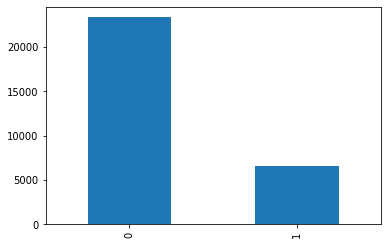

In [36]:
# check the distribution of target column,This is a unbalanced data set
ic(creditData['default.payment.next.month'].value_counts())
creditData['default.payment.next.month'].value_counts().plot(kind ='bar')

default.payment.next.month  SEX
0                           1       9015
                            2      14349
1                           1       2873
                            2       3763
Name: ID, dtype: int64
default.payment.next.month  EDUCATION
0                           0               14
                            1             8549
                            2            10700
                            3             3680
                            4              116
                            5              262
                            6               43
1                           1             2036
                            2             3330
                            3             1237
                            4                7
                            5               18
                            6                8
Name: ID, dtype: int64
default.payment.next.month  MARRIAGE
0                           0              49
                          

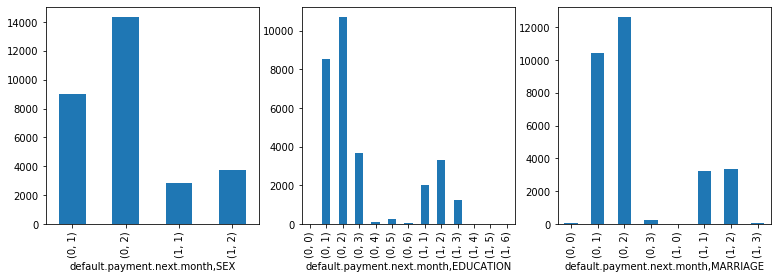

In [65]:
# check the default groups deeper0, more femal have credit card,more university and granduate school students
cols = ['SEX', 'EDUCATION', 'MARRIAGE']
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(13,4))
ax
for i, item in enumerate(cols):
    print(creditData.groupby(['default.payment.next.month',item]).ID.count())
    creditData.groupby(['default.payment.next.month',item]).ID.count().plot(kind ='bar', ax=ax[i])

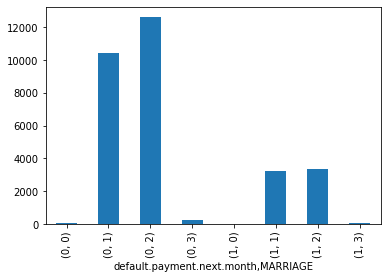

In [42]:
creditData.groupby(['default.payment.next.month','MARRIAGE']).ID.count().plot(kind='bar')